In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from network import Network

p_0s, lbds = [0.1, 0.2 , 0.3, 0.4], [1, 1.5, 2, 2.5]
# set up a 2D table to diplay the connection images with plt.subplot
subplot_dimensions = (len(p_0s), len(lbds))
fig=plt.figure(figsize=(10,10))
axes=[]
for i, p_0s in enumerate(p_0s):
    for j, lbd in enumerate(lbds):
        Net = Network(physical_dimensions=2, p_0=p_0s, lbd=lbd)
        Net.init_neurons(number_of_neurons=100)
        # use np.imshow(Net.M) to add the connection image to the right subplot
        axes.append(fig.add_subplot(*subplot_dimensions, i*subplot_dimensions[0]+j+1))
        axes[-1].set_title(f'p_0={p_0s}, lbd={lbd}')
        plt.imshow(Net.M)

fig.tight_layout()   
plt.show()

initialize inputs and outputs neurons


TypeError: bad operand type for abs(): 'NoneType'

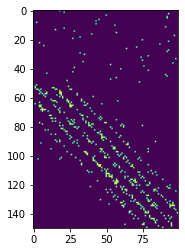

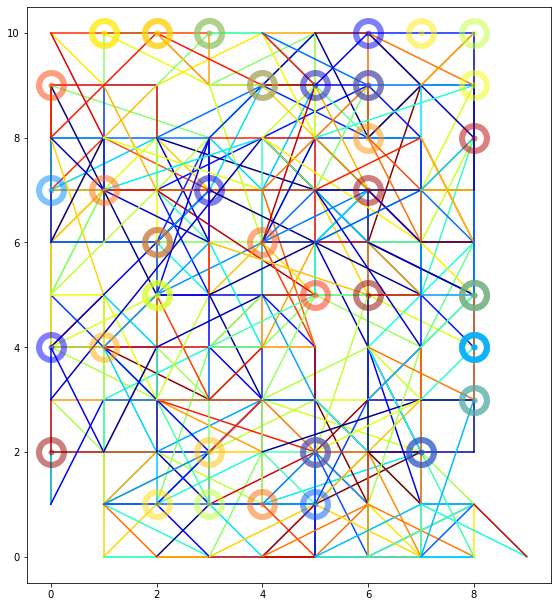

In [3]:
b1, b2 = (1.5, 2)
beta1, beta2 = (2, 2)
alpha1, alpha2 = (beta1*b1, beta2*b2/(beta1*b1))
params_dict = {'physical_dimensions': 2,
               'p_0': 0.5, 'lbd': 2, 
               'gamma': 1, 'avg_coef': 0.02, 'avg_sz_coef': 0.2, 
               'reset_v': -2, 
               'alpha1': 0.1, 'alpha2': 1, 
               'dt': 0.1, 'update_eq': "LPL"}
        
net = Network(**params_dict)
net.init_neurons(number_of_neurons=100)
net.init_input_neurons(num_imputs=50,num_outputs=2)
plt.imshow(net.M)
net.visualize_network()

In [3]:
iter=500
w_sums = [0]*iter
w0_=[0]*iter
net.W_threshold = 0.3
azs = [0]*iter
for i in range(iter):
    net.update_neurons(inputs= (i%10==0)*np.ones((50,)))#np.random.randint(0, 1, (2,)))
    net.update_weights()
    #net.update_connectivity()
    w_sums[i]=np.sum(net.W)
    w0_[i]=net.W[0,0]
    azs[i]=np.mean(net.sig_z)
print(np.array(net.raster).shape)
plt.plot(w_sums)
plt.plot(w0_)
net.visualize_network()
x,y=net.raster_plot()
plt.figure(figsize=(8,8))
print(np.array(x).shape)
plt.scatter(x,y)
plt.figure(figsize=(8,8))
plt.plot(azs)
#net.visualize_network()

KeyboardInterrupt: 

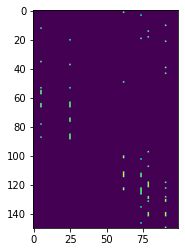

In [ ]:
plt.imshow(net.W)

In [ ]:

b1, b2 = (1.5, 2)
beta1, beta2 = (2, 2)
alpha1, alpha2 = (beta1*b1, beta2*b2/(beta1*b1))
params_dict = {'physical_dimensions': 2,
            'p_0': 0.5, 'lbd': 2, 
            'gamma': 1, 'avg_coef': 0.9, 
            'reset_v': -2, 
            'alpha1': 0.1, 'alpha2': 0.3, 
            'dt': 0.1, 'update_eq': "LPL"}
        
net = Network(**params_dict)   
net.init_neurons(number_of_neurons=3)
net.init_input_neurons(num_imputs=1,num_outputs=1)
net.M = np.array([[1, 0, 0], [0,1,0],[0,0,1],[0,0,0]])
net.W = np.random.randn(4, 3)*net.M
net.input_neurons_indices = [0]
net.output_neurons_indices = [2]
def test_network(weights, inputs_, alpha3=0.3,iter=2500):
    net.reset(weights)
    ws = []
    net.W_threshold = 0
    net.alpha2 = alpha3
    for i in range(iter):
        net.update_neurons(inputs= inputs_[i])
        net.update_weights()
        #net.update_connectivity()
        ws.append(net.W)
    """
    plt.plot(w_sums)
    plt.plot(w0_)
    #net.visualize_network()
    x,y=net.raster_plot()
    plt.figure(figsize=(8,8))
    print(np.array(x).shape)
    plt.scatter(x,y)
    net.visualize_network()"""
    return ws
#initial_weights = lambda a,b : b*np.random.randn(4, 3)+a
initial_weights = lambda a,b : np.array([[a, 0, 0], [0,b,0],[0,0,1],[0,0,0]])

w_alphas = []
for alpha3 in np.linspace(0.01, 2, 10):
    w_alphas.append([test_network(initial_weights(a, 1), np.ones((2500,1)), alpha3)[-1][0, 0] for a in np.linspace(-5,5,10)])

initialize inputs and outputs neurons


KeyboardInterrupt: 

In [ ]:
plt.scatter(w_alphas)
#plt.plot(np.linspace(-5,5,10), [w[0, 0] for w in w_final_bs])
#plt.plot(np.linspace(-5,5,10), np.linspace(-5,5,10))
#plt.legend(['a', 'b', "y=x"])

TypeError: scatter() missing 1 required positional argument: 'y'